<a href="https://colab.research.google.com/github/Bangkit-JKT2-D/fruits-fresh-rotten-classification/blob/master/fresh_rotten_fruit_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import
The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [44]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("[INFO] Imports Done")

[INFO] Imports Done


In [45]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.5.0


## Download Dataset

In [ ]:
## Install Kaggle library
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

## 1) Upload kaggle API key file
from google.colab import files
uploaded = files.upload()

## 2) Auth with our Kaggle Account
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

## 3) Download Dataset
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification
!unzip -q *.zip 

print("[INFO] DATASET READY")

[INFO] DATASET READY


## Split Dataset to Train, Test and Validation


In [ ]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
    # base_dir = '/tmp'
    base_dir = "/content/using_inception_results";
    make_dir(base_dir)

    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_apples_dir = make_dir(os.path.join(train_dir, 'Fresh Apples'))
    train_fresh_bananas_dir = make_dir(os.path.join(train_dir, 'Fresh Bananas'))
    train_fresh_oranges_dir = make_dir(os.path.join(train_dir, 'Fresh Oranges'))
    train_rotten_apples_dir = make_dir(os.path.join(train_dir, 'Rotten Apples'))
    train_rotten_bananas_dir = make_dir(os.path.join(train_dir, 'Rotten Bananas'))
    train_rotten_oranges_dir = make_dir(os.path.join(train_dir, 'Rotten Oranges'))

    validation_fresh_apples_dir = make_dir(os.path.join(validation_dir, 'Fresh Apples'))
    validation_fresh_bananas_dir = make_dir(os.path.join(validation_dir, 'Fresh Bananas'))
    validation_fresh_oranges_dir = make_dir(os.path.join(validation_dir, 'Fresh Oranges'))
    validation_rotten_apples_dir = make_dir(os.path.join(validation_dir, 'Rotten Apples'))
    validation_rotten_bananas_dir = make_dir(os.path.join(validation_dir, 'Rotten Bananas'))
    validation_rotten_oranges_dir = make_dir(os.path.join(validation_dir, 'Rotten Oranges'))

    test_fresh_apples_dir = make_dir(os.path.join(test_dir, 'Fresh Apples'))
    test_fresh_bananas_dir = make_dir(os.path.join(test_dir, 'Fresh Bananas'))
    test_fresh_oranges_dir = make_dir(os.path.join(test_dir, 'Fresh Oranges'))
    test_rotten_apples_dir = make_dir(os.path.join(test_dir, 'Rotten Apples'))
    test_rotten_bananas_dir = make_dir(os.path.join(test_dir, 'Rotten Bananas'))
    test_rotten_oranges_dir = make_dir(os.path.join(test_dir, 'Rotten Oranges'))


except OSError:
    pass

In [ ]:
dataset_train_dir = "/content/dataset/train"
dataset_test_dir = "/content/dataset/test"

fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))

fapples_train images =  1693
fbananas_train images =  1581
foranges_train images =  1466
rapples_train images =  2342
rbananas_train images =  2224
roranges_train images =  1595

fapples_test images =  395
fbananas_test images =  381
foranges_test images =  388
rapples_test images =  601
rbananas_test images =  530
roranges_test images =  403


In [ ]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
        # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
        # img.save(os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))
        # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
        # img.save(os.path.join(VALIDATION, filename))

In [ ]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_bananas_dir, validation_fresh_bananas_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_oranges_dir, validation_fresh_oranges_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_bananas_dir, validation_fresh_bananas_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_oranges_dir, validation_fresh_oranges_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)

In [ ]:
print(len(os.listdir(train_fresh_apples_dir)))
print(len(os.listdir(train_fresh_bananas_dir)))
print(len(os.listdir(train_fresh_oranges_dir)))
print(len(os.listdir(train_rotten_apples_dir)))
print(len(os.listdir(train_rotten_bananas_dir)))
print(len(os.listdir(train_rotten_oranges_dir)))

print()

print(len(os.listdir(validation_fresh_apples_dir)))
print(len(os.listdir(validation_fresh_bananas_dir)))
print(len(os.listdir(validation_fresh_oranges_dir)))
print(len(os.listdir(validation_rotten_apples_dir)))
print(len(os.listdir(validation_rotten_bananas_dir)))
print(len(os.listdir(validation_rotten_oranges_dir)))

print()

print(len(os.listdir(test_fresh_apples_dir)))
print(len(os.listdir(test_fresh_bananas_dir)))
print(len(os.listdir(test_fresh_oranges_dir)))
print(len(os.listdir(test_rotten_apples_dir)))
print(len(os.listdir(test_rotten_bananas_dir)))
print(len(os.listdir(test_rotten_oranges_dir)))

1135
1060
983
1570
1491
1069

558
521
483
772
733
526

395
381
388
601
530
403


## Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

print("[INFO] Data Augmentation Done")

[INFO] Data Augmentation Done


## Preview Augmentation

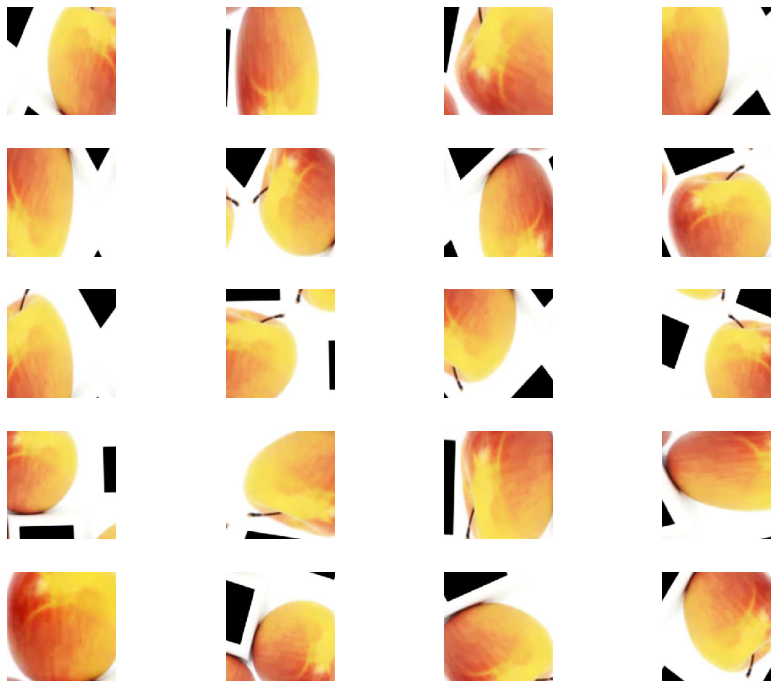

In [ ]:
path_aug = os.path.join(train_fresh_apples_dir, os.listdir(train_fresh_apples_dir)[-1])
img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot((len(preview_img)/4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(150, 150),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

## Image Data Generator

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(150,150), #?
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(150,150), #?
                                                         class_mode='categorical')

Found 7308 images belonging to 6 classes.
Found 3593 images belonging to 6 classes.


## Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

## Sequential Model (Baseline)

In [ ]:
#if you want to use tranfer learning, skip this cell
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

## Transfer Learning

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False)

for layer in pre_trained_model.layers:
    layer.trainable = False

##Adding last layer

In [ ]:
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(6, activation='softmax')(x)

model = Model(pre_trained_model.input, x) 
model.compile(optimizer='adam', #RMSprop(lr=0.0001), adam
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
print("LAYERS: ", len(model.layers))

LAYERS:  315


In [ ]:
train_len = 0
for foldername in os.listdir(train_dir):
    train_len = train_len + len(os.listdir(os.path.join(train_dir,foldername)))
    
val_len = 0
for foldername in os.listdir(validation_dir):
    val_len = val_len + len(os.listdir(os.path.join(validation_dir,foldername)))

print(f"Training Images Length: {train_len}")
print(f"Validation Images Length: {val_len}")

Training Images Length: 7308
Validation Images Length: 3593


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=15,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

print("[INFO] Model Tained")

Epoch 1/15
228/228 [==============================] - 530s 2s/step - loss: 2.6968 - accuracy: 0.8469 - val_loss: 0.2180 - val_accuracy: 0.9349
Epoch 2/15
228/228 [==============================] - 527s 2s/step - loss: 0.2879 - accuracy: 0.9039 - val_loss: 0.1439 - val_accuracy: 0.9527
Epoch 3/15
228/228 [==============================] - 523s 2s/step - loss: 0.2505 - accuracy: 0.9141 - val_loss: 0.1676 - val_accuracy: 0.9443
Epoch 4/15
228/228 [==============================] - 522s 2s/step - loss: 0.2675 - accuracy: 0.9100 - val_loss: 0.1463 - val_accuracy: 0.9482
Epoch 5/15
228/228 [==============================] - 519s 2s/step - loss: 0.2289 - accuracy: 0.9224 - val_loss: 0.1289 - val_accuracy: 0.9546
Epoch 6/15
228/228 [==============================] - 523s 2s/step - loss: 0.2099 - accuracy: 0.9283 - val_loss: 0.1213 - val_accuracy: 0.9647
Epoch 7/15
228/228 [==============================] - 522s 2s/step - loss: 0.2066 - accuracy: 0.9320 - val_loss: 0.1403 - val_accuracy: 0.9516

## Plot Loss and Accuracy

<Figure size 432x288 with 0 Axes>

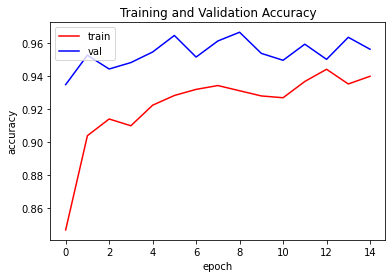

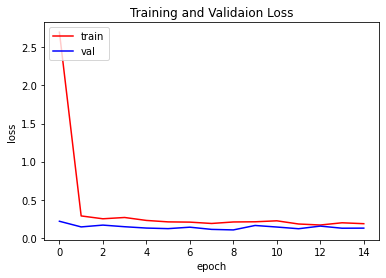

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('epoch_vs_accuracy_15_epochs.png')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.savefig('epoch_vs_loss_15_epochs.png')
plt.figure()

## Evaluate Model

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)

Found 2698 images belonging to 6 classes.
2698/2698 [==============================] - 211s 78ms/step - loss: 0.1139 - accuracy: 0.9600
accuracy test:  0.9599703550338745


In [ ]:
model.save('inception_model_15_epochs.h5')

## Predict Image

Saving rotton_orange.jpg to rotton_orange.jpg


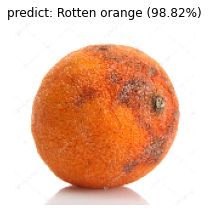

In [ ]:
from tensorflow.keras.utils import get_file
import pathlib
import cv2

model_predict = tf.keras.models.load_model('model.h5')
model_predict.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)

  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Apple')
  elif np.where(classes[0] == max)[0] == 1:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Banana')
  elif np.where(classes[0] == max)[0] == 2:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Orange')
  elif np.where(classes[0] == max)[0] == 3:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Apple')
  elif np.where(classes[0] == max)[0] == 4:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Banana')
  else:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten orange')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name)/4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')